# Classification with KNN and logistic regression
In this notebook, we will do classification. Build model and evaluate.

## Loading dataset from `sklearn`
In this notebook. We will use the iris dataset from `sklearn`. `sklearn` contains a number of toy dataset for learning and also for research. The iris dataset is one of the simplest dataset in `sklearn`.

In [1]:
from sklearn.datasets import load_iris

In [2]:
dataset = load_iris()

The returned `dataset` is a subclass of Python `dict`

In [3]:
isinstance(dataset, dict)

True

The dataset (samples and features) can be accessed through the ``"data"`` key.
And the labels can be accessed through the ``"target"`` key.

The returned objects are both NumPy arrays.

In [4]:
dataset["data"].shape

(150, 4)

In [5]:
dataset["target"].shape

(150,)

From the shapes of the arrays we can see that there are 150 samples and 4 features. The data is a matrix and the target is the vector.

The specific names of the features and the labels are available using the following keys.

In [6]:
dataset["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
dataset["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Another format for the dataset is using `pandas.DataFrame` instead of NumPy array. 

`pandas` and `DataFrame` better integrates the data and the names and thus more suitable for data science.

In [8]:
dataset2 = load_iris(as_frame=True)

Now the data becomes a `pandas.Dataframe`. It is clearly easier to read than a NumPy array.

In [9]:
dataset2["data"]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


However, in this tutorial, we will stick to NumPy because of easier syntax. You are welcome to explore the features of `pandas` and `DataFrame`.

Usually, we use `X` to denote the dataset matrix, and use `y` to denote the label vector.

In [10]:
X = dataset["data"]
y = dataset["target"]

## Split the dataset
In machine learning it is compulsory to evaluate the performance of your model with data that the model has never seen before.

Thus, the dataset is usually splitted into the training set and the test set.

We can use `train_test_split` from `sklearn` to help up split the dataset into the training set and the test set.

In [11]:
from sklearn.model_selection import train_test_split

In the following, we use 20% of the data as the test set, and the left is for the training set.

The `train_test_split` function randomly shuffles the dataset before splitting. 

The labels are increasing in the original dataset and simply picking the last 20% can be problematic.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We use `random_state` to make sure the splitting is reproducible. 

The random numbers in computers are so-called pseudo random numbers. You can make them reproducible by setting a random seed.

In [13]:
import numpy as np

In [14]:
np.random.seed(42)
np.random.rand(10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

Now we can check that our training set and test set are properly splitted

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

Because of the random seed, we can expect on every run the splitting is the same.

If you wish to further split training, validation and test set, you can call `train_test_split` twice.

## Build KNN classification model
The syntax is exactly the same as the syntax in our previous tutorial.

We instantiate a KNN class and call `fit` to build the model.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

If we look at the prediction on training data, then based on the principles of KNN, the accuracy should be 100%.

In [17]:
knn.predict(X_train)

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 1, 0, 1, 2])

In [18]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

We should be able to see how well our model performs exactly on the test data.

In [19]:
knn.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [20]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Unfortunately (or not), since the iris dataset is too simple, our KNN algorithm can in fact exactly classify different categories.

<img src="https://github.com/user-attachments/assets/f3a64b58-48e7-4b07-a142-cd2b2920cb6a" width="800">

## Build artificial dataset using `sklearn` and run KNN
Let's generate a slightly more complex dataset to demonstrate the difference between training error and test error.

In [21]:
from sklearn.datasets import make_classification

In [22]:
X, y = make_classification(n_samples=250, n_features=20, random_state=42)
X.shape, y.shape

((250, 20), (250,))

Note that because of the random seed, we can expect that for every executation the results will be the same

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((200, 20), (50, 20), (200,), (50,))

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1])

In [26]:
y_test

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0])

We can see that now our model is making some mistakes. Let's measure the error more quantitatively and calculate the accuracy.

In NumPy, `==` performs element-wise comparison between two NumPy arrays

In [27]:
y_pred == y_test

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False])

Calculate the summation, and `True` is considered as 1, while `False` is considered as 0.

In [28]:
np.sum(y_pred == y_test) / len(y_pred)

np.float64(0.82)

Alternatively, we can import relevant functions in `sklearn` to help us calculate

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.82

Question
- How will modifying the $k$ in KNN affect the result?

## Finding the optimal hyper-parameter
**Hyper-parameters** are parameters in models that are specified upon construction. 

In contrast, "parameters" are for the parameters that changes during the learning process. 

Hyper-parameters do not change during learning.

In KNN, there is one important hyper-parameter, the number of neighbours $k$. 

And as a special case KNN has no "parameter".

In general, ML models have parameters as well as hyper-parameters.

In order to find out the optimal number of neighbours, we need to first further split our dataset and create the validation set.

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((150, 20), (50, 20), (150,), (50,))

We loop through different values of  `n_neighbors` and try to find out the best value.

In [31]:
n_neighbours_list = list(range(2, 11))
accuracy_list = []

for n_neighbours in n_neighbours_list:
    knn = KNeighborsClassifier(n_neighbors=n_neighbours)
    knn.fit(X_train, y_train)
    # note here we make prediction based on the validation set
    y_pred = knn.predict(X_valid)
    # and compare the result with the validation labels
    accuracy = accuracy_score(y_valid, y_pred)
    print(n_neighbours, accuracy)
    accuracy_list.append(accuracy)

2 0.8
3 0.82
4 0.86
5 0.88
6 0.9
7 0.94
8 0.94
9 0.94
10 0.92


Looks like in general the larger $k$ the better. Let's visualize the result

In [32]:
from matplotlib import pyplot as plt

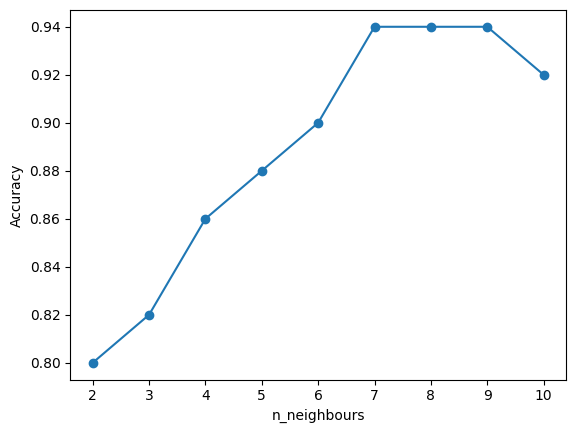

In [33]:
plt.plot(n_neighbours_list, accuracy_list, marker="o")
plt.xlabel("n_neighbours")
plt.ylabel("Accuracy")
plt.show()

So the optimal $k$ in this case is roughly 7. 

It is tempting to report that the final accuracy is 0.94, but a better way is to evaluate the model on the test set.

In [34]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
# the test set comes in
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.84

Note that the result may not be what you have expected. 

So it is very important to report the final result using the test set, as this is the truly **unseen** data.

## Cross-validation with `sklearn`
In view of the difference of the errors in the validation set and the test set, we may ask
> Will using another validation set give us a different value of optimal `n_neighbours`?

Let's find out!

We modify `random_state` to generate a different validation set.

The other code is exactly the same as the code above

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=40) # the only change
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((150, 20), (50, 20), (150,), (50,))

2 0.8
3 0.94
4 0.88
5 0.94
6 0.9
7 0.92
8 0.92
9 0.88
10 0.84


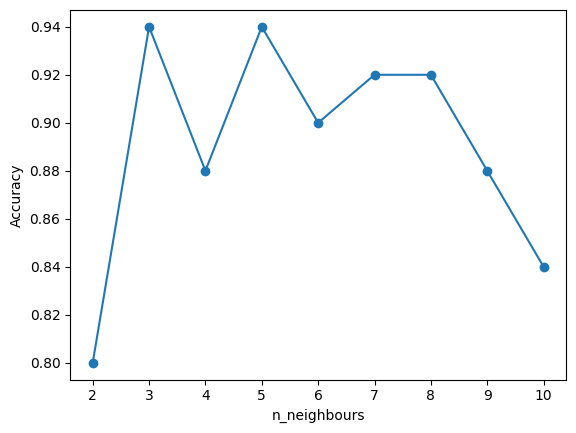

In [36]:
n_neighbours_list = list(range(2, 11))
accuracy_list = []

for n_neighbours in n_neighbours_list:
    knn = KNeighborsClassifier(n_neighbors=n_neighbours)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    print(n_neighbours, accuracy)
    accuracy_list.append(accuracy)

plt.plot(n_neighbours_list, accuracy_list, marker="o")
plt.xlabel("n_neighbours")
plt.ylabel("Accuracy")
plt.show()

Indeed, we find that using a different validation set gives us different result.

In order to obtain reliable results, sometimes we resort to $k$-fold **cross-validation**. For more details, please refer to the slides.

Note that here the $k$ is not the same $k$ in KNN. They just happen to use the same symbol.

<img src="https://github.com/user-attachments/assets/90974e96-3693-4a4f-9403-00e4485ff0a4" width="800">

It is tedious to write all the code. So let's use a function in `sklearn`

In [37]:
from sklearn.model_selection import cross_val_score

Note here we do not need to manually split the validation set. `sklearn` will do it for us.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_neighbours_list = list(range(2, 11))
scores_list = []

for n_neighbours in n_neighbours_list:
    knn = KNeighborsClassifier(n_neighbors=n_neighbours)
    # `cross_val_score` will return accuracy for each split, so we take the mean
    # `cv=4` means 4-fold cross-validation, so there'll be four numbers before taking the mean
    score = cross_val_score(knn, X_train, y_train, cv=4)
    scores_list.append(np.mean(score))

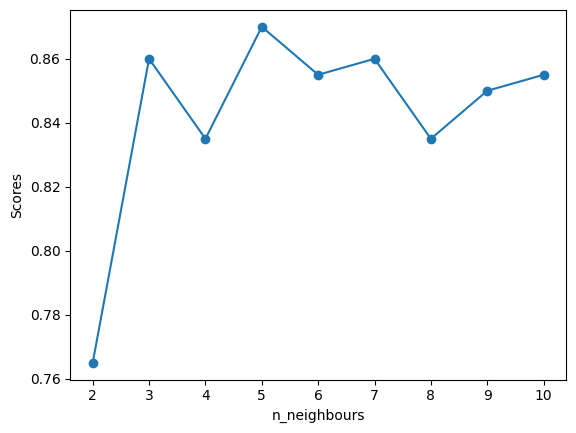

In [39]:
plt.plot(n_neighbours_list, scores_list, marker="o")
plt.xlabel("n_neighbours")
plt.ylabel("Scores")
plt.show()

From this cross-validation we see that actually as long as $k\ge 3$ the accuracy should be OK.

## Hand-written digit classification
Now, let's move forward, in three different aspects
- Data & Task: Classify hand-written digits using the dataset from `sklearn`.
- Model: Instead of KNN, we try logistic regression. Note that although the name is "regression", it is actually a classification model.
- Metric: We'll see the limitation of the metric of accuracy and how other metrics can solve the problem.

<img src="https://scikit-learn.org/stable/_images/sklearn-datasets-load_digits-1_01.png">

In [40]:
from sklearn.datasets import load_digits

In [41]:
dataset = load_digits()

X = dataset["data"]
y = dataset["target"]

X.shape, y.shape

((1797, 64), (1797,))

For simplicity and demonstration, we turn this task into a binary classification problem - Whether the digit is 5.

In [42]:
y = y == 5

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(X_train, y_train)

LogisticRegression()

We may see a warning here about that the optimizer has not converged.

This is not a serious problem in machine learning. Ultimately, we look at the evaluation metrics to see if our model works or not.

In [47]:
# training error
accuracy_score(lr.predict(X_train), y_train)

1.0

In [48]:
# test error
accuracy_score(lr.predict(X_test), y_test)

0.9861111111111112

So the accuracy is quite high. 

But notice that if we simply predict the number is not 5, the accuracy will still be 90%, which looks to be pretty good.

In [49]:
accuracy_score([False] * len(y_test), y_test)

0.8694444444444445

It is not **fair** that this trash model can "perform so well".

Therefore, we may use precision, recall, and the f1 score. 

The logistic regression model will perform reasonably well on these metrics.

Yet, the dummy model will get a 0 score.

<img src="https://github.com/user-attachments/assets/95127c00-b49b-4fde-b0d2-faec93d5ad06" width=1000>

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [51]:
precision_score(lr.predict(X_test), y_test)

0.9574468085106383

In [52]:
recall_score(lr.predict(X_test), y_test)

0.9375

In [53]:
# the harmonic mean of precision and recall
f1_score(lr.predict(X_test), y_test)

0.9473684210526315

In [54]:
precision_score([False] * len(y_test), y_test)

0.0

In [55]:
recall_score([False] * len(y_test), y_test)

/home/weitangli/miniconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [56]:
f1_score([False] * len(y_test), y_test)

0.0